In [1]:
import scipy.integrate as integrate
from math import *
from numpy import sqrt, pi
from sympy import *
init_printing()
from IPython.display import display

In [2]:
# Exercise 1

In [3]:
x = symbols('x')
func = lambda x: (e**x)


In [4]:
def T(n,x):
    if(n == 0):
        return 1
    elif (n == 1):
        return x
    return 2*x *T(n-1,x) - T(n-2,x)

In [5]:
def C(foo,n):
    fun = func
    if n == 0:
        return integrate((1/pi)*fun(x)/(1-x**2)**0.5,(x,-1,1)).evalf(6)
    else:
        return integrate((2/pi)*fun(x)*T(n,x)/(1-x**2)**0.5,(x,-1,1)).evalf(6)

In [6]:
C(func,1)

In [7]:
def Chebyshev(f1,n):
    print('\nn\tCn\n')
    for i in range(n):
        print('%d\t%0.12f\n' %(i, C(f1,i)))
    f = IndexedBase("f")
    i = Idx('i')
    for i in range(n):
        ans = 0
        display(f[i])
        print("=")
        if i == 0:
            ans = ans + C(f1,i)*T(i,x)
            display(ans)
        else:
            for j in range(i+1):
                ans = ans + C(f1,j)*T(j,x)
            display(ans)        
    

In [8]:
def ChebyshevUse(f1,n):
    
    ans = 0
    for j in range(n,-1,-1):
        ans = ans + C(f1,j)*T(j,x)
        
    return ans

In [9]:
ChebyshevUse(func,0)

In [10]:
def Y2(f1,ind,xv):
    expr = ChebyshevUse(f1,ind)
    return expr.subs(x,xv)
Y2(func,0,-1)

In [11]:
import matplotlib.pyplot as plt
import numpy as num
%matplotlib inline

In [62]:
xx = [-1, -0.5, 0, 0.5, 1]
yy = []
yy.extend([func(-1), func(-0.5),func(0),func(0.5), func(1)])

y2 = []
y2.extend([Y2(func,0,-1),Y2(func,0,-0.5),Y2(func,0,0),Y2(func,0,0.5),Y2(func,0,1)])

ry2 = []
ry2.extend([-func(-1)+Y2(func,0,-1),-func(-0.5)+Y2(func,0,-0.5),-func(0)+Y2(func,0,0),-func(0.5)+Y2(func,0,0.5),-func(1)+Y2(func,0,1)])
#------------------------------------------------------------------------------------------------------------

y21 = []
y21.extend([Y2(func,1,-1),Y2(func,1,-0.5),Y2(func,1,0),Y2(func,1,0.5),Y2(func,1,1)])

ry21 = []
ry21.extend([-func(-1)+Y2(func,1,-1),-func(-0.5)+Y2(func,1,-0.5),-func(0)+Y2(func,1,0),-func(0.5)+Y2(func,1,0.5),-func(1)+Y2(func,1,1)])
#------------------------------------------------------------------------------------------------------------

In [63]:
Y2(func,0,-1)
abs(-1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


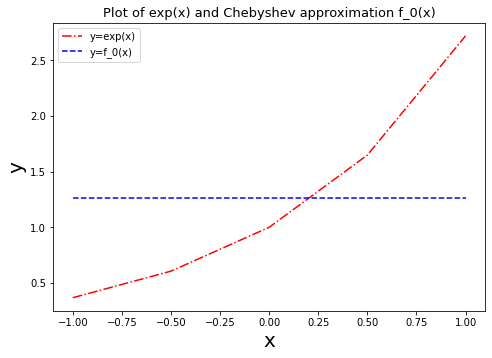

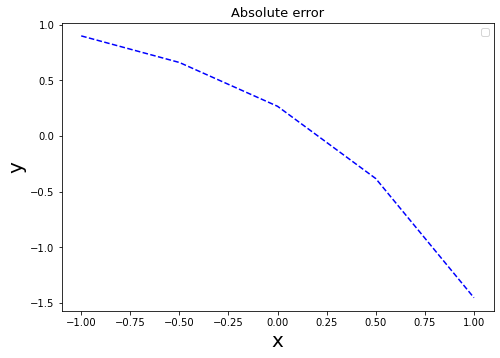

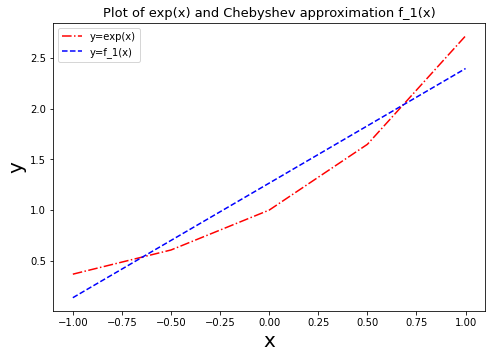

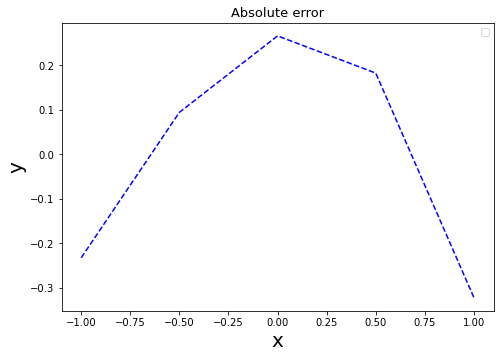

In [64]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.set_title('Plot of exp(x) and Chebyshev approximation f_0(x)',fontsize=13)
ax.set_xlabel('x',fontsize=20)
ax.set_ylabel('y',fontsize=20)
plt.plot(xx,yy,'-.r',label='y=exp(x)')
plt.plot(xx,y2,'--b',label='y=f_0(x)')
ax.legend()


fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.set_title('Absolute error',fontsize=13)
ax.set_xlabel('x',fontsize=20)
ax.set_ylabel('y',fontsize=20)
plt.plot(xx,ry2,'--b')
ax.legend()

fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.set_title('Plot of exp(x) and Chebyshev approximation f_1(x)',fontsize=13)
ax.set_xlabel('x',fontsize=20)
ax.set_ylabel('y',fontsize=20)
plt.plot(xx,yy,'-.r',label='y=exp(x)')
plt.plot(xx,y21,'--b',label='y=f_1(x)')
ax.legend()

fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.set_title('Absolute error',fontsize=13)
ax.set_xlabel('x',fontsize=20)
ax.set_ylabel('y',fontsize=20)
plt.plot(xx,ry21,'--b')
ax.legend()